In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

In [ ]:
coffee = pd.read_csv('/content/UNdata_Export_20251031_192312121.csv')
coffee.head()

,Country or Area,Element,Year,Unit,Value,Value Footnotes
0,Kenya,Production,2021,t,34500.0,NaN
1,Kenya,Production,2020,t,36900.0,NaN
2,Kenya,Production,2019,t,44500.0,NaN
3,Kenya,Production,2018,t,41375.0,NaN
4,Kenya,Production,2017,t,38620.0,NaN


In [ ]:
coffee = coffee.drop(columns=['Value Footnotes','Country or Area','Element','Unit'])
coffee.head()

,Year,Value
0,2021,34500.0
1,2020,36900.0
2,2019,44500.0
3,2018,41375.0
4,2017,38620.0


In [ ]:
coffee = coffee.sort_values(by='Year', ascending=True)
coffee.head()

,Year,Value
60,1961,28100.0
59,1962,50000.0
58,1963,40500.0
57,1964,41400.0
56,1965,39300.0


Text(0, 0.5, 'Value')

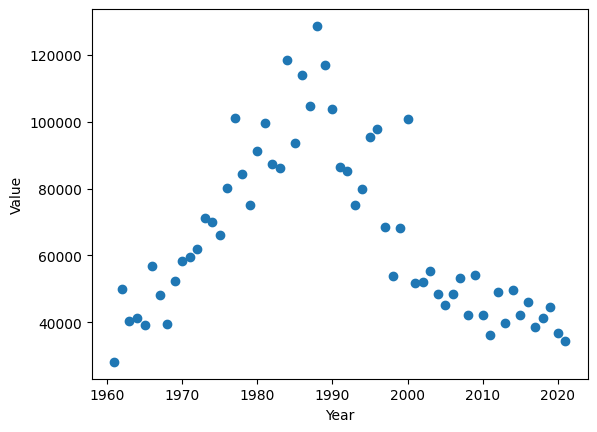

In [ ]:
plt.scatter(coffee['Year'], coffee['Value'])
plt.xlabel('Year')
plt.ylabel('Value')

Text(0, 0.5, 'Value')

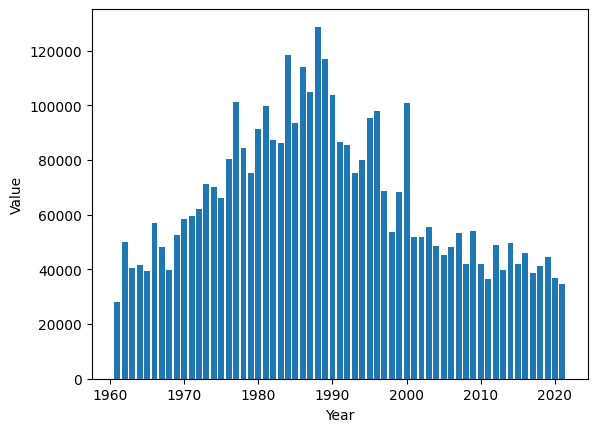

In [ ]:
plt.bar(coffee['Year'], coffee['Value'])
plt.xlabel('Year')
plt.ylabel('Value')

Text(0, 0.5, 'Frequency')

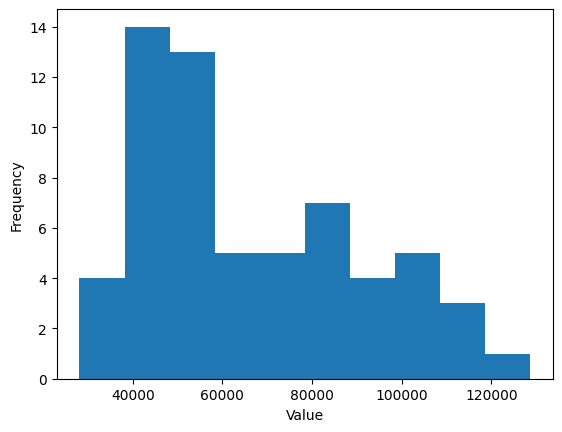

In [ ]:
plt.hist(coffee['Value'])
plt.xlabel('Value')
plt.ylabel('Frequency')

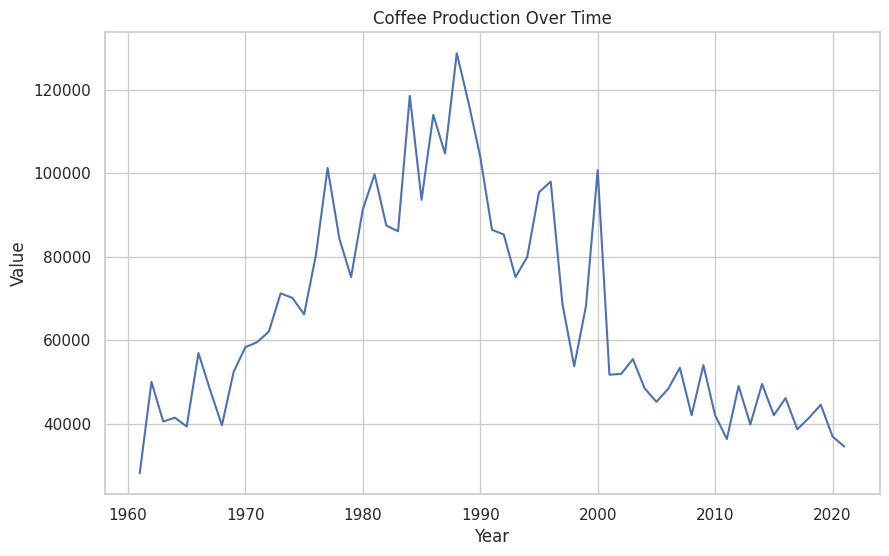

In [ ]:
sns.set(style = 'whitegrid')
plt.figure(figsize=(10,6))
sns.lineplot(x='Year', y='Value', data=coffee)
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Coffee Production Over Time')
plt.show()

<Figure size 1500x800 with 0 Axes>

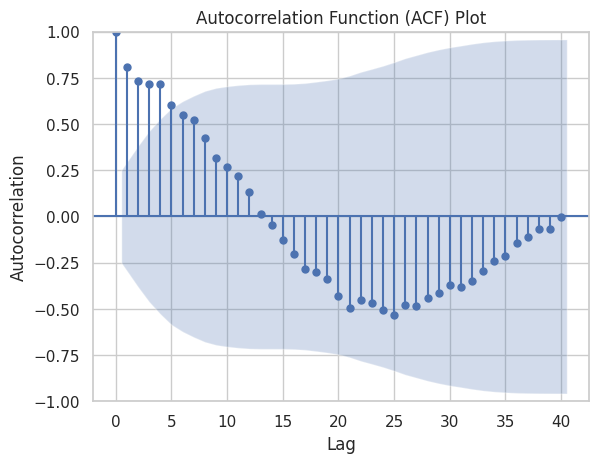

In [ ]:
plt.figure(figsize=(15,8))
plot_acf(coffee['Value'], lags=40)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) Plot')
plt.show()

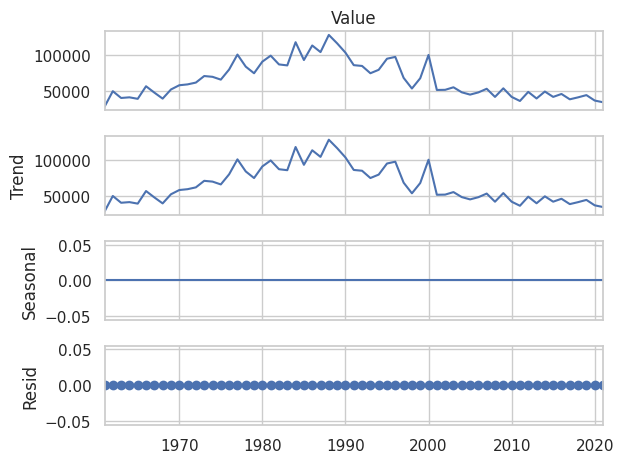

In [ ]:
coffee_indexed = coffee.set_index('Year')
coffee_indexed.index = pd.to_datetime(coffee_indexed.index, format='%Y')
coffee_decompose = sm.tsa.seasonal_decompose(coffee_indexed['Value'], model='additive')
coffee_decompose.plot()
plt.show()

In [ ]:
coffee_arima = ARIMA(coffee_indexed['Value'], order=(1, 1, 1))
coffee_arima_fit = coffee_arima.fit()
coffee_forecast = coffee_arima_fit.forecast(steps=10)
print(coffee_forecast)

2022-01-01    35893.265312
2023-01-01    37175.876550
2024-01-01    38356.621935
2025-01-01    39443.591723
2026-01-01    40444.233635
2027-01-01    41365.403889
2028-01-01    42213.414178
2029-01-01    42994.074916
2030-01-01    43712.735050
2031-01-01    44374.318710
Freq: YS-JAN, Name: predicted_mean, dtype: float64


In [ ]:
coffee_result = adfuller(coffee['Value'])
print('ADF Statistic: %f' % coffee_result[0])
print('p-value: %f' % coffee_result[1])
print('Critical Values:', coffee_result[4])

ADF Statistic: -1.067520
p-value: 0.727849
Critical Values: {'1%': np.float64(-3.552928203580539), '5%': np.float64(-2.9147306250000002), '10%': np.float64(-2.595137155612245)}


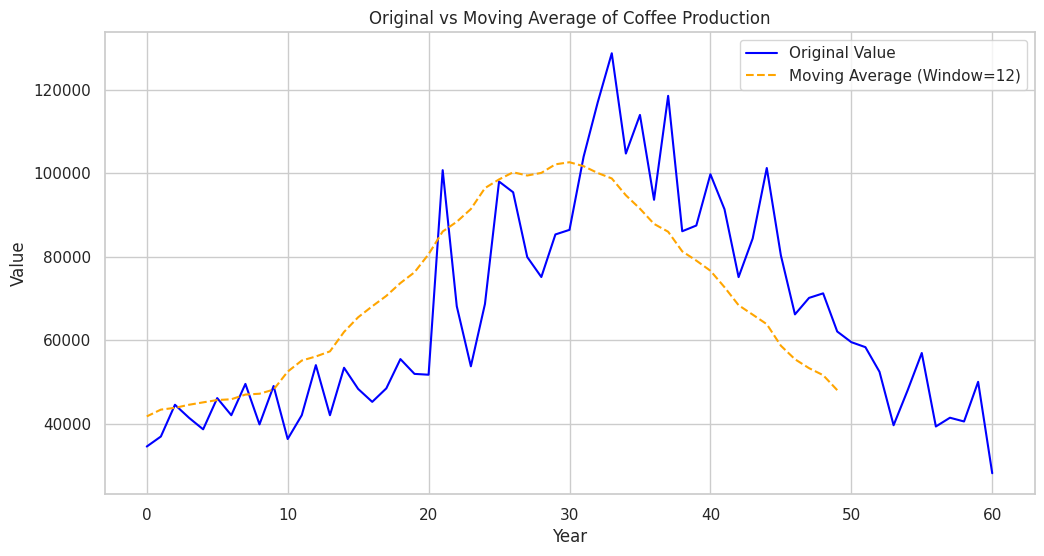

In [ ]:
window_size = 12
coffee['Value_smoothed'] = coffee['Value'].rolling(window=window_size).mean()

plt.figure(figsize=(12, 6))

plt.plot(coffee['Value'], label='Original Value', color='blue')
plt.plot(coffee['Value_smoothed'], label=f'Moving Average (Window={window_size})', linestyle='--', color='orange')

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Original vs Moving Average of Coffee Production')
plt.legend()
plt.show()

In [ ]:
coffee_combined = pd.concat([coffee['Year'], coffee['Value'], coffee['Value_smoothed']], axis=1)
print(coffee_combined)

    Year    Value  Value_smoothed
60  1961  28100.0             NaN
59  1962  50000.0             NaN
58  1963  40500.0             NaN
57  1964  41400.0             NaN
56  1965  39300.0             NaN
..   ...      ...             ...
4   2017  38620.0    45082.333333
3   2018  41375.0    44505.250000
2   2019  44500.0    43766.250000
1   2020  36900.0    43341.250000
0   2021  34500.0    41716.250000

[61 rows x 3 columns]


In [ ]:
coffee_combined.dropna(subset=['Value_smoothed'], inplace = True)
coffee_combined.head()

,Year,Value,Value_smoothed
49,1972,62048.0,48004.000000
48,1973,71190.0,51594.833333
47,1974,70103.0,53270.083333
46,1975,66152.0,55407.750000
45,1976,80303.0,58649.666667


In [ ]:
coffee_combined_indexed = coffee_combined.set_index('Year')
coffee_combined_indexed.index = pd.to_datetime(coffee_combined_indexed.index, format='%Y')

coffee_arima = ARIMA(coffee_combined_indexed['Value'], order=(1, 1, 1))
coffee_arima_fit = coffee_arima.fit()
coffee_forecast = coffee_arima_fit.forecast(steps=10)
print(coffee_forecast)

2022-01-01    36252.825627
2023-01-01    37849.666842
2024-01-01    39304.404737
2025-01-01    40629.685124
2026-01-01    41837.028461
2027-01-01    42936.929998
2028-01-01    43938.951008
2029-01-01    44851.801904
2030-01-01    45683.417960
2031-01-01    46441.028284
Freq: YS-JAN, Name: predicted_mean, dtype: float64


In [ ]:
coffee_combined_result = adfuller(coffee_combined['Value_smoothed'])
print('ADF Statistic: %f' % coffee_combined_result[0])
print('p-value: %f' % coffee_combined_result[1])
print('Critical Values:', coffee_combined_result[4])

ADF Statistic: -3.095757
p-value: 0.026869
Critical Values: {'1%': np.float64(-3.584828853223594), '5%': np.float64(-2.9282991495198907), '10%': np.float64(-2.6023438271604937)}


## Citations

https://www.geeksforgeeks.org/data-analysis/time-series-data-visualization-in-python/

https://coderivers.org/blog/python-for-time-series-analysis/